In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression

%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
data_GOOG_fixed = pd.read_excel("Data_GOOG.xlsx")
data_IBM_fixed = pd.read_excel("Data_IBM.xlsx")
data_AAPL_fixed = pd.read_excel("Data_AAPL.xlsx")

In [23]:
class TrendAnalyzer():
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        self.regression = LinearRegression()
        self.column = column_of_interest
        self.data = data
        
        x = self.data.index.to_numpy().reshape(-1,1)
        y = self.data[self.column].to_numpy().reshape(-1,1)
        
        self.regression.fit(x, y)
        self.preds = self.regression.predict(self.data.index.to_numpy().reshape(-1,1))
    
    def draw_plot_with_trend(self):
        plt.plot(self.data.index, self.data[self.column], self.data.index, self.preds.flatten())
    
    def draw_plot_without_trend(self):
        err = self.data[self.column].to_numpy().reshape(-1,1) - self.preds
        plt.figure(figsize = (12,7))
        plt.plot(self.data.index, err.flatten(), self.data.index, np.zeros((len(self.data.index))))

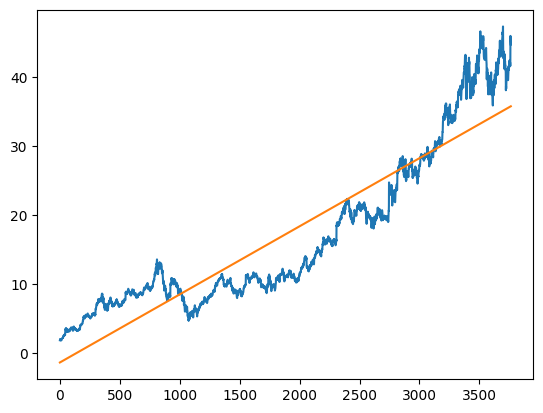

In [24]:
analyzer_GOOG = TrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG.draw_plot_with_trend()

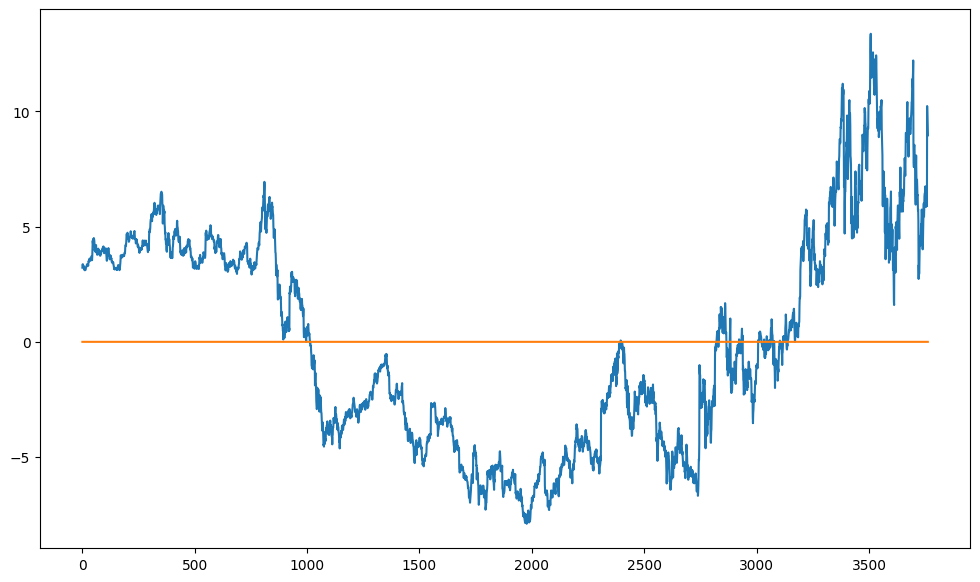

In [25]:
analyzer_GOOG.draw_plot_without_trend()

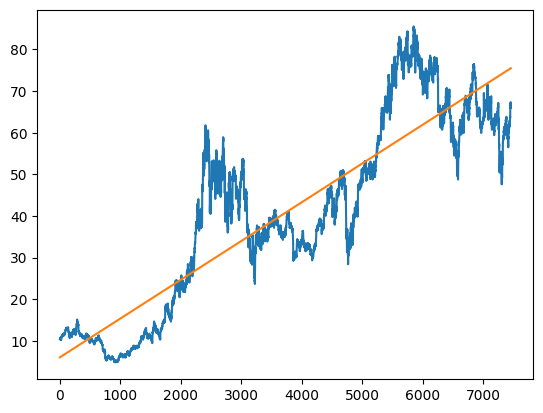

In [27]:
analyzer_IBM = TrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM.draw_plot_with_trend()

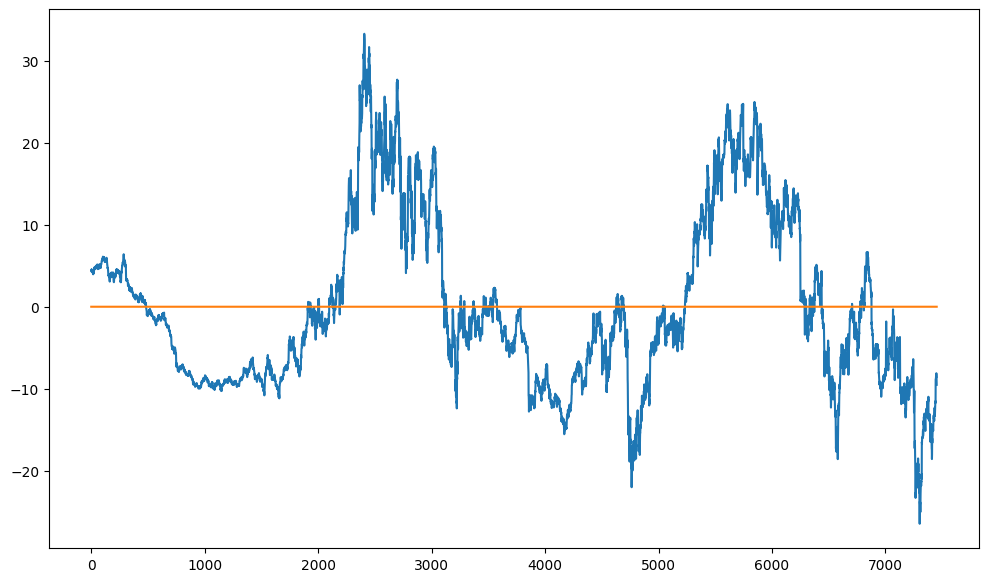

In [28]:
analyzer_IBM.draw_plot_without_trend()

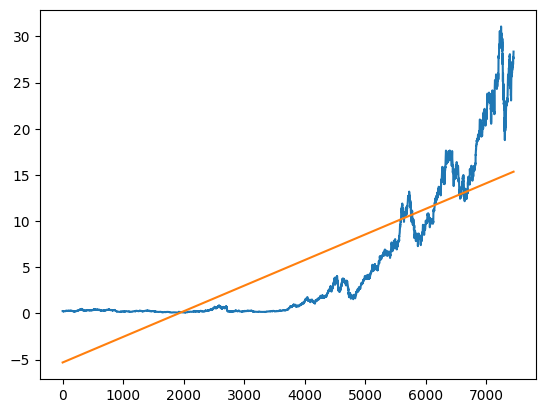

In [29]:
analyzer_AAPL = TrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL.draw_plot_with_trend()

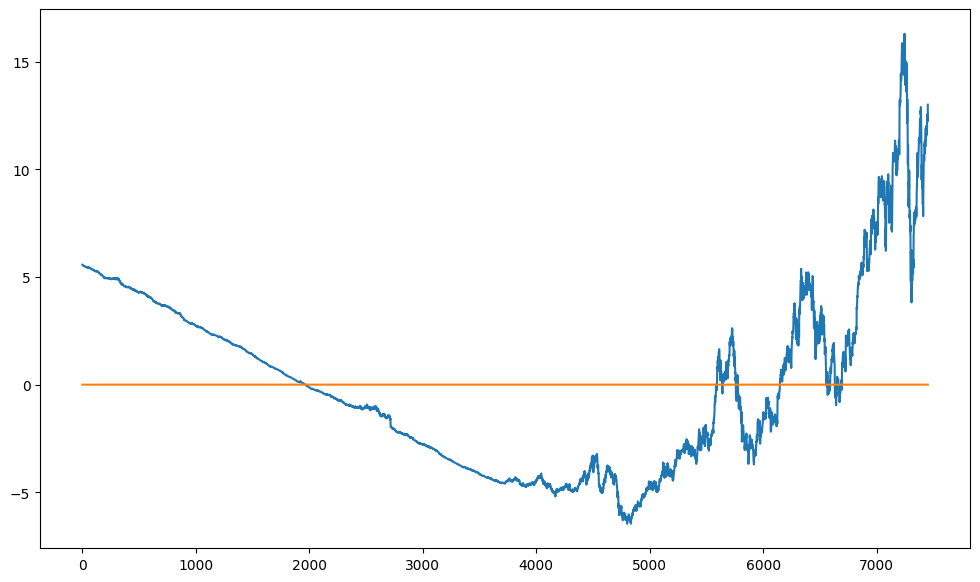

In [30]:
analyzer_AAPL.draw_plot_without_trend()